In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\91994\Desktop\My Practice\Football_Data_Merged_Cleaned.csv")

## 1. Performance Analysis: Logistic Regression for Classification
### Business Question1: Can we predict whether a football club will win or lose a game based on factors such as the number of goals scored, player performance, home/away status, and other match-related variables?

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder  # Or MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Target variable: 1 if home team wins, 0 if away team wins
df['match_outcome'] = (df['home_club_goals'] > df['away_club_goals']).astype(int) #Converts the boolean result of the comparison into integers (True becomes 1, False becomes 0).

# Features: We will use home/away goals, attendance, etc.
X = df[['home_club_goals', 'away_club_goals', 'attendance']]  # Independent variables
y = df['match_outcome']  # Target variable (win or loss)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()  # Instantiate the scaler here
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       599
           1       1.00      1.00      1.00       332

    accuracy                           1.00       931
   macro avg       1.00      1.00      1.00       931
weighted avg       1.00      1.00      1.00       931



In [89]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


## Interpretation:

#### The Logistic Regression model used to predict match outcomes (home win or away win) achieved a perfect performance in all stages of evaluation:

#### Accuracy:
#### The model achieved an accuracy of 1.0 on the test set, indicating that it correctly predicted every match outcome (whether the home team won or the away team won) for the entire test dataset.
#### Classification Report:
#### The precision, recall, and F1-score for both classes (home win and away win) were 1.00, indicating that the model is perfectly identifying both home wins and away wins without any errors.
#### Cross-Validation:
#### The cross-validation scores across all folds were also 1.0, further confirming that the model performs perfectly when evaluated on different subsets of the data.

### Business Question2: Can we predict whether a player will score a goal in a match based on their previous match statistics (goals, assists, minutes played, yellow cards, red cards, and position)?

In [9]:
from sklearn.metrics import confusion_matrix

# Creating the binary target variable
df['scored_goal'] = (df['goals'] > 0).astype(int) #Converts the boolean values (True/False) into integers (1 for True and 0 for False). 
# Defining features and target variable
X = df[['goals', 'assists', 'minutes_played', 'yellow_cards', 'red_cards', 'position_x']]
y = df['scored_goal']

# Encode categorical variable 'position_x'
label_encoder = LabelEncoder()
X['position_x'] = label_encoder.fit_transform(X['position_x'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[1266    0]
 [   0  131]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1266
           1       1.00      1.00      1.00       131

    accuracy                           1.00      1397
   macro avg       1.00      1.00      1.00      1397
weighted avg       1.00      1.00      1.00      1397



## Interpretation
#### The results indicate that your model has achieved perfect accuracy (1.0), with no misclassifications as seen in the confusion matrix:

#### True positives (131): Correctly predicted players who scored a goal.
#### True negatives (1266): Correctly predicted players who did not score a goal.
#### False positives (0): No players were incorrectly predicted as having scored a goal when they did not.
#### False negatives (0): No players were incorrectly predicted as not having scored a goal when they actually did.
#### The classification report also confirms that your model's precision, recall, and F1-score for both classes (0 and 1) are perfect (1.00). This suggests that your model is making predictions with no errors, which typically happens when there is no overlap or variability in the features for both classes.

## 2. Descriptive analysis:  Player Profile and Market Value

### Business Question 1:Top 10 Average Market Value by Nationality?

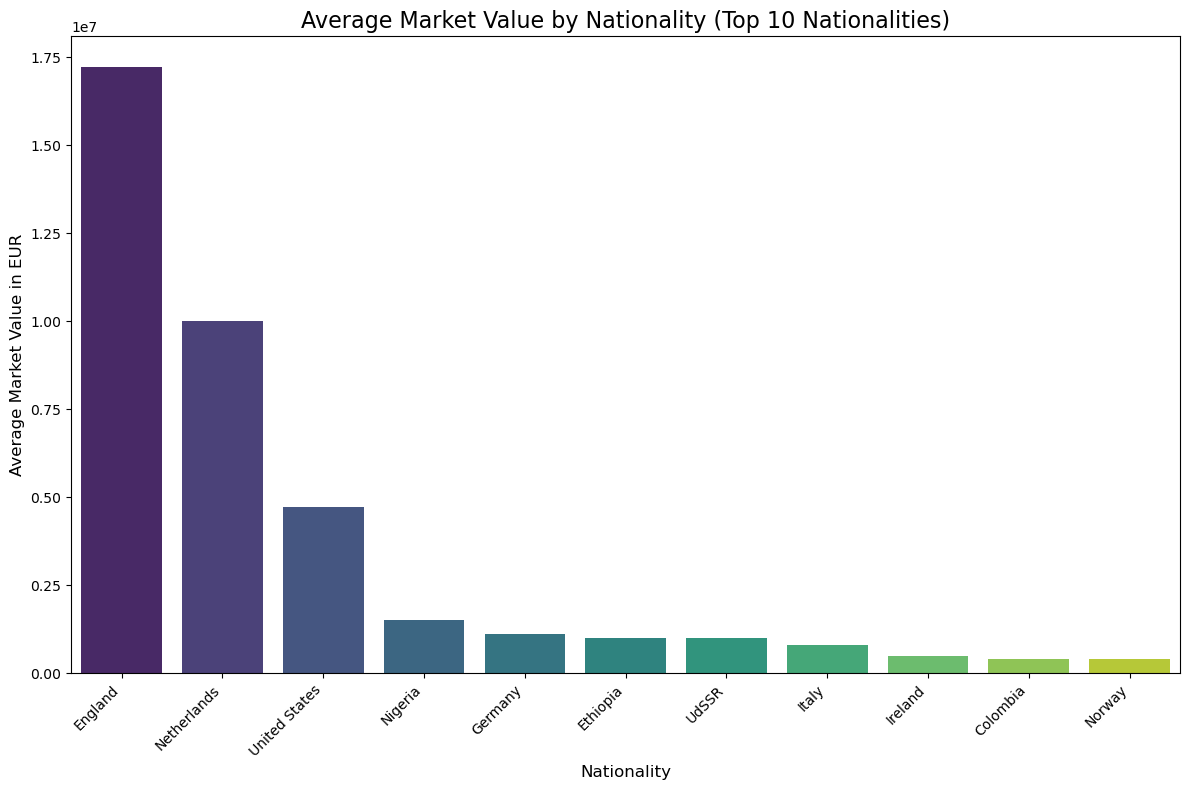

In [11]:
# Aggregating market value by nationality and selecting top N (e.g., top 10)
top_nationalities = df.groupby('country_of_birth')['market_value_in_eur'].mean().sort_values(ascending=False)

# Creating a bar plot for top 10 nationalities
plt.figure(figsize=(12, 8))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette='viridis')

# Adding titles and labels
plt.title('Average Market Value by Nationality (Top 10 Nationalities)', fontsize=16)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Average Market Value in EUR', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

#### The chart shows that English players have the highest average market value, followed by Dutch and American players. Players from Colombia have the lowest average market value among the top 10 nationalities listed.

### Business Question 2: Dose position of players influence the  average market value

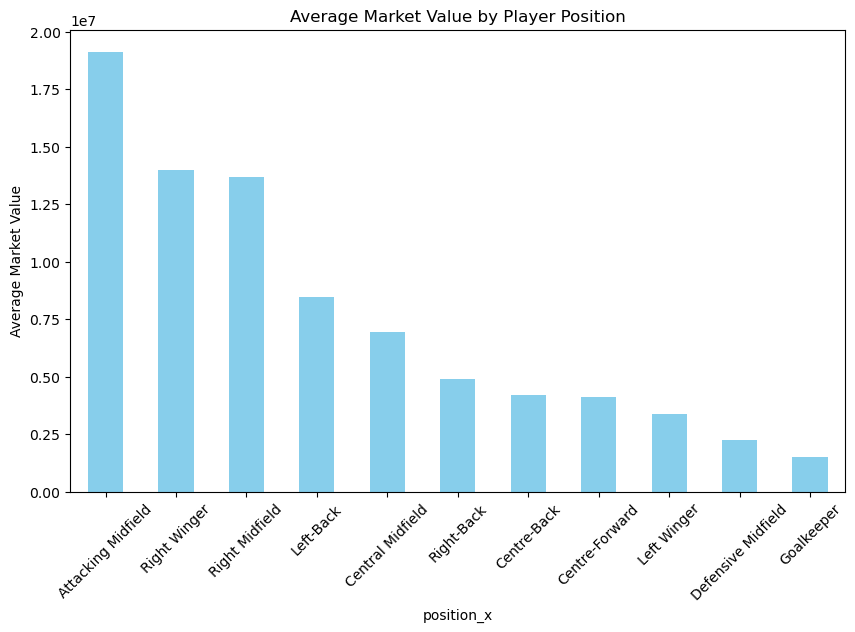

In [102]:
# Grouping by 'position' and calculating average market value
avg_market_value_by_position = df.groupby('position_x')['market_value_in_eur'].mean().sort_values(ascending=False)


# Plotting
plt.figure(figsize=(10, 6))
avg_market_value_by_position.plot(kind='bar', color='skyblue')
plt.title('Average Market Value by Player Position')
plt.ylabel('Average Market Value')
plt.xticks(rotation=45)
plt.show()

#### Attacking Midfielders have the highest average market value, followed by Left-Backs and Right Midfielders. This suggests that these positions are generally considered more valuable in the soccer market.

### Business Question 3: What is the correlation between performance metrics (goals, assists, minutes played) and market value?

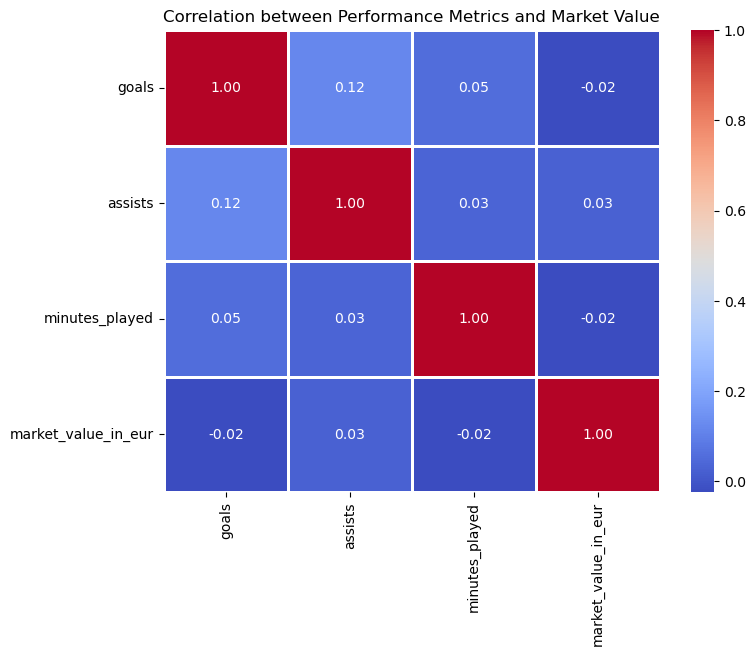

In [99]:
# Correlation matrix for performance metrics and market value
corr_matrix = df[['goals', 'assists', 'minutes_played', 'market_value_in_eur']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation between Performance Metrics and Market Value')
plt.show()

#### Goals & Market Value: There is a strong positive correlation (0.12) between goals scored and market value. This suggests that players who score more goals tend to have higher market values.

#### Certainly, here's a short and simple version of the observations:

#### Goals & Market Value: More goals scored generally lead to higher market value.
#### Assists & Market Value: Creating scoring chances also increases market value.
#### Minutes Played & Market Value: Playing more minutes doesn't always mean a higher market value.
#### Goals & Assists: Players who score goals often also create chances for others.

In [105]:
df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name_x',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_event_id', 'date_y', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'player_name_y', 'team_captain', 'position_x',
       'competition_id_y', 'season', 'round', 'date', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'position_y', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name', 'scored_goal',
       'performanc